# Singleton pattern

## Intent: Ensure a class has only one instance and provide a global point of access to it. This pattern is useful when exactly one object is needed to coordinate actions across the system.

## Motivation: Singleton pattern is particularly useful when a single instance of a class needs to maintain a state and coordinate actions across the application. It's often used in scenarios like database connections, logging, file managers, where a single point of control and access is desirable.

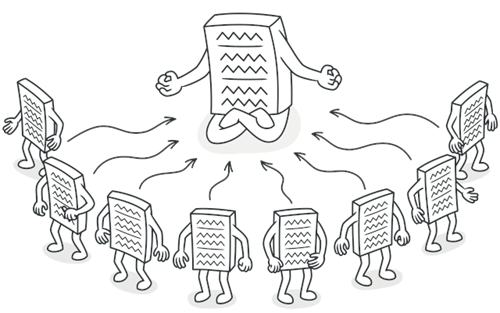

In [1]:
class SingletonMeta(type):
    """
    The Singleton class can be implemented in different ways in Python. Some
    possible methods include: base class, decorator, metaclass. We will use the
    metaclass because it is best suited for this purpose.
    """

    _instances = {}

    def __call__(cls, *args, **kwargs):
        """
        Possible changes to the value of the `__init__` argument do not affect
        the returned instance.
        """
        if cls not in cls._instances:
            instance = super().__call__(*args, **kwargs)
            cls._instances[cls] = instance
        return cls._instances[cls]


class Singleton(metaclass=SingletonMeta):
    def some_business_logic(self):
        """
        Finally, any singleton should define some business logic, which can be
        executed on its instance.
        """

        # ...


if __name__ == "__main__":
    # The client code.

    s1 = Singleton()
    s2 = Singleton()

    if id(s1) == id(s2):
        print("Singleton works, both variables contain the same instance.")
    else:
        print("Singleton failed, variables contain different instances.")

Singleton works, both variables contain the same instance.


# Decorator Pattern

## Intent: Attach additional responsibilities to an object dynamically. Decorators provide a flexible alternative to subclassing for extending functionality.

## Motivation: The Decorator pattern allows for the dynamic addition of behaviors to objects without modifying their existing classes. It's particularly useful in situations where you need to extend the functionality of objects at runtime, or when subclassing would lead to an explosion of subclasses to cover every combination of behaviors.
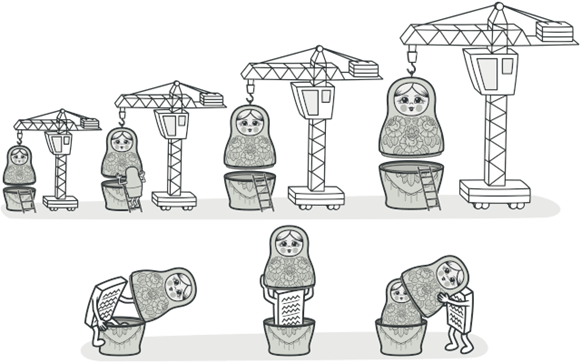

In [6]:
class Component():
    """
    The base Component interface defines operations that can be altered by
    decorators.
    """

    def operation(self) -> str:
        pass


class ConcreteComponent(Component):
    """
    Concrete Components provide default implementations of the operations. There
    might be several variations of these classes.
    """

    def operation(self) -> str:
        return "ConcreteComponent"


class Decorator(Component):
    """
    The base Decorator class follows the same interface as the other components.
    The primary purpose of this class is to define the wrapping interface for
    all concrete decorators. The default implementation of the wrapping code
    might include a field for storing a wrapped component and the means to
    initialize it.
    """

    _component: Component = None

    def __init__(self, component: Component) -> None:
        self._component = component

    @property
    def component(self) -> Component:
        """
        The Decorator delegates all work to the wrapped component.
        """

        return self._component

    def operation(self) -> str:
        return self._component.operation()


class ConcreteDecoratorA(Decorator):
    """
    Concrete Decorators call the wrapped object and alter its result in some
    way.
    """

    def operation(self) -> str:
        """
        Decorators may call parent implementation of the operation, instead of
        calling the wrapped object directly. This approach simplifies extension
        of decorator classes.
        """
        return f"ConcreteDecoratorA({self.component.operation()})"


class ConcreteDecoratorB(Decorator):
    """
    Decorators can execute their behavior either before or after the call to a
    wrapped object.
    """

    def operation(self) -> str:
        return f"ConcreteDecoratorB({self.component.operation()})"


def client_code(component: Component) -> None:
    """
    The client code works with all objects using the Component interface. This
    way it can stay independent of the concrete classes of components it works
    with.
    """

    # ...

    print(f"RESULT: {component.operation()}", end="")

    # ...


if __name__ == "__main__":
    # This way the client code can support both simple components...
    simple = ConcreteComponent()
    print("Client: I've got a simple component:")
    client_code(simple)
    print("\n")

    # ...as well as decorated ones.
    #
    # Note how decorators can wrap not only simple components but the other
    # decorators as well.
    decorator1 = ConcreteDecoratorA(simple)
    decorator2 = ConcreteDecoratorB(decorator1)
    print("Client: Now I've got a decorated component:")
    client_code(decorator2)

Client: I've got a simple component:
RESULT: ConcreteComponent

Client: Now I've got a decorated component:
RESULT: ConcreteDecoratorB(ConcreteDecoratorA(ConcreteComponent))

# Command Pattern

## Intent: Encapsulate a request as an object, thereby allowing for parameterization of clients with different requests, queue or log requests, and support undoable operations.

## Motivation: The Command pattern is used to abstract and encapsulate all the information needed to call a method at a later time. This includes the method name, the object that owns the method, and values for the method parameters. It's particularly useful in designing applications that need to support undo, logging, or transactional behavior.


In [3]:
from __future__ import annotations
from abc import ABC, abstractmethod


class Command(ABC):
    """
    The Command interface declares a method for executing a command.
    """

    @abstractmethod
    def execute(self) -> None:
        pass


class SimpleCommand(Command):
    """
    Some commands can implement simple operations on their own.
    """

    def __init__(self, payload: str) -> None:
        self._payload = payload

    def execute(self) -> None:
        print(f"SimpleCommand: See, I can do simple things like printing"
              f"({self._payload})")


class ComplexCommand(Command):
    """
    However, some commands can delegate more complex operations to other
    objects, called "receivers."
    """

    def __init__(self, receiver: Receiver, a: str, b: str) -> None:
        """
        Complex commands can accept one or several receiver objects along with
        any context data via the constructor.
        """

        self._receiver = receiver
        self._a = a
        self._b = b

    def execute(self) -> None:
        """
        Commands can delegate to any methods of a receiver.
        """

        print("ComplexCommand: Complex stuff should be done by a receiver object", end="")
        self._receiver.do_something(self._a)
        self._receiver.do_something_else(self._b)


class Receiver:
    """
    The Receiver classes contain some important business logic. They know how to
    perform all kinds of operations, associated with carrying out a request. In
    fact, any class may serve as a Receiver.
    """

    def do_something(self, a: str) -> None:
        print(f"\nReceiver: Working on ({a}.)", end="")

    def do_something_else(self, b: str) -> None:
        print(f"\nReceiver: Also working on ({b}.)", end="")


class Invoker:
    """
    The Invoker is associated with one or several commands. It sends a request
    to the command.
    """

    _on_start = None
    _on_finish = None

    """
    Initialize commands.
    """

    def set_on_start(self, command: Command):
        self._on_start = command

    def set_on_finish(self, command: Command):
        self._on_finish = command

    def do_something_important(self) -> None:
        """
        The Invoker does not depend on concrete command or receiver classes. The
        Invoker passes a request to a receiver indirectly, by executing a
        command.
        """

        print("Invoker: Does anybody want something done before I begin?")
        if isinstance(self._on_start, Command):
            self._on_start.execute()

        print("Invoker: ...doing something really important...")

        print("Invoker: Does anybody want something done after I finish?")
        if isinstance(self._on_finish, Command):
            self._on_finish.execute()


if __name__ == "__main__":
    """
    The client code can parameterize an invoker with any commands.
    """

    invoker = Invoker()
    invoker.set_on_start(SimpleCommand("Say Hi!"))
    receiver = Receiver()
    invoker.set_on_finish(ComplexCommand(
        receiver, "Send email", "Save report"))

    invoker.do_something_important()

Invoker: Does anybody want something done before I begin?
SimpleCommand: See, I can do simple things like printing(Say Hi!)
Invoker: ...doing something really important...
Invoker: Does anybody want something done after I finish?
ComplexCommand: Complex stuff should be done by a receiver object
Receiver: Working on (Send email.)
Receiver: Also working on (Save report.)

# Observer Pattern

## Intent: Define a one-to-many dependency between objects so that when one object changes state, all its dependents are notified and updated automatically.

## Motivation: The Observer pattern is used to establish a subscription mechanism to notify multiple objects about any events that happen to the object they’re observing. This pattern is widely used in implementing distributed event handling systems and is fundamental to the "model-view-controller" (MVC) architectural pattern.


In [4]:
from __future__ import annotations
from abc import ABC, abstractmethod
from random import randrange
from typing import List


class Subject(ABC):
    """
    The Subject interface declares a set of methods for managing subscribers.
    """

    @abstractmethod
    def attach(self, observer: Observer) -> None:
        """
        Attach an observer to the subject.
        """
        pass

    @abstractmethod
    def detach(self, observer: Observer) -> None:
        """
        Detach an observer from the subject.
        """
        pass

    @abstractmethod
    def notify(self) -> None:
        """
        Notify all observers about an event.
        """
        pass


class ConcreteSubject(Subject):
    """
    The Subject owns some important state and notifies observers when the state
    changes.
    """

    _state: int = None
    """
    For the sake of simplicity, the Subject's state, essential to all
    subscribers, is stored in this variable.
    """

    _observers: List[Observer] = []
    """
    List of subscribers. In real life, the list of subscribers can be stored
    more comprehensively (categorized by event type, etc.).
    """

    def attach(self, observer: Observer) -> None:
        print("Subject: Attached an observer.")
        self._observers.append(observer)

    def detach(self, observer: Observer) -> None:
        self._observers.remove(observer)

    """
    The subscription management methods.
    """

    def notify(self) -> None:
        """
        Trigger an update in each subscriber.
        """

        print("Subject: Notifying observers...")
        for observer in self._observers:
            observer.update(self)

    def some_business_logic(self) -> None:
        """
        Usually, the subscription logic is only a fraction of what a Subject can
        really do. Subjects commonly hold some important business logic, that
        triggers a notification method whenever something important is about to
        happen (or after it).
        """

        print("\nSubject: I'm doing something important.")
        self._state = randrange(0, 10)

        print(f"Subject: My state has just changed to: {self._state}")
        self.notify()


class Observer(ABC):
    """
    The Observer interface declares the update method, used by subjects.
    """

    @abstractmethod
    def update(self, subject: Subject) -> None:
        """
        Receive update from subject.
        """
        pass


"""
Concrete Observers react to the updates issued by the Subject they had been
attached to.
"""


class ConcreteObserverA(Observer):
    def update(self, subject: Subject) -> None:
        if subject._state < 3:
            print("ConcreteObserverA: Reacted to the event")


class ConcreteObserverB(Observer):
    def update(self, subject: Subject) -> None:
        if subject._state == 0 or subject._state >= 2:
            print("ConcreteObserverB: Reacted to the event")


if __name__ == "__main__":
    # The client code.

    subject = ConcreteSubject()

    observer_a = ConcreteObserverA()
    subject.attach(observer_a)

    observer_b = ConcreteObserverB()
    subject.attach(observer_b)

    subject.some_business_logic()
    subject.some_business_logic()

    subject.detach(observer_a)

    subject.some_business_logic()

Subject: Attached an observer.
Subject: Attached an observer.

Subject: I'm doing something important.
Subject: My state has just changed to: 0
Subject: Notifying observers...
ConcreteObserverA: Reacted to the event
ConcreteObserverB: Reacted to the event

Subject: I'm doing something important.
Subject: My state has just changed to: 2
Subject: Notifying observers...
ConcreteObserverA: Reacted to the event
ConcreteObserverB: Reacted to the event

Subject: I'm doing something important.
Subject: My state has just changed to: 2
Subject: Notifying observers...
ConcreteObserverB: Reacted to the event


# Strategy Pattern

## Intent: Define a family of algorithms, encapsulate each one, and make them interchangeable. Strategy lets the algorithm vary independently from clients that use it.

## The Strategy pattern is used when you want to define a class that will have one behavior that is similar to other behaviors in a list. You need to select one of several strategies or algorithms at runtime depending on the specific needs. This is useful in situations where you need to dynamically change algorithms used in an application.


In [8]:
from __future__ import annotations
from abc import ABC, abstractmethod
from typing import List


class Context():
    """
    The Context defines the interface of interest to clients.
    """

    def __init__(self, strategy: Strategy) -> None:
        """
        Usually, the Context accepts a strategy through the constructor, but
        also provides a setter to change it at runtime.
        """

        self._strategy = strategy

    @property
    def strategy(self) -> Strategy:
        """
        The Context maintains a reference to one of the Strategy objects. The
        Context does not know the concrete class of a strategy. It should work
        with all strategies via the Strategy interface.
        """

        return self._strategy

    @strategy.setter
    def strategy(self, strategy: Strategy) -> None:
        """
        Usually, the Context allows replacing a Strategy object at runtime.
        """

        self._strategy = strategy

    def do_some_business_logic(self) -> None:
        """
        The Context delegates some work to the Strategy object instead of
        implementing multiple versions of the algorithm on its own.
        """

        # ...

        print("Context: Sorting data using the strategy (not sure how it'll do it)")
        result = self._strategy.do_algorithm(["a", "b", "c", "d", "e"])
        print(",".join(result))

        # ...


class Strategy(ABC):
    """
    The Strategy interface declares operations common to all supported versions
    of some algorithm.

    The Context uses this interface to call the algorithm defined by Concrete
    Strategies.
    """

    @abstractmethod
    def do_algorithm(self, data: List):
        pass


"""
Concrete Strategies implement the algorithm while following the base Strategy
interface. The interface makes them interchangeable in the Context.
"""


class ConcreteStrategyA(Strategy):
    def do_algorithm(self, data: List) -> List:
        return sorted(data)


class ConcreteStrategyB(Strategy):
    def do_algorithm(self, data: List) -> List:
        return reversed(sorted(data))


if __name__ == "__main__":
    # The client code picks a concrete strategy and passes it to the context.
    # The client should be aware of the differences between strategies in order
    # to make the right choice.

    context = Context(ConcreteStrategyA())
    print("Client: Strategy is set to normal sorting.")
    context.do_some_business_logic()
    print()

    print("Client: Strategy is set to reverse sorting.")
    context.strategy = ConcreteStrategyB()
    context.do_some_business_logic()

Client: Strategy is set to normal sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
a,b,c,d,e

Client: Strategy is set to reverse sorting.
Context: Sorting data using the strategy (not sure how it'll do it)
e,d,c,b,a
